Импорт библиотек

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from itertools import chain

In [ ]:
from scipy.stats import *

In [ ]:
sns.set_style('darkgrid')

Импорт ДатаФрейма

In [ ]:
t_df = pd.read_csv('train (2).csv',sep=',')

In [ ]:
t_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


# №1

####Постройте круговую диаграмму для признака `Rooms`, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

In [ ]:
t_df['Rooms']

0       3.0
1       1.0
2       3.0
3       1.0
4       2.0
       ... 
9995    2.0
9996    2.0
9997    1.0
9998    1.0
9999    1.0
Name: Rooms, Length: 10000, dtype: float64

Values

In [ ]:
values_list = list(t_df.groupby('Rooms').count()['Id'])
values_list

[8, 3705, 3880, 2235, 150, 18, 1, 2, 1]

Labels

In [ ]:
list(map(str, list(t_df.groupby('Rooms').count().index)))

['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '10.0', '19.0']

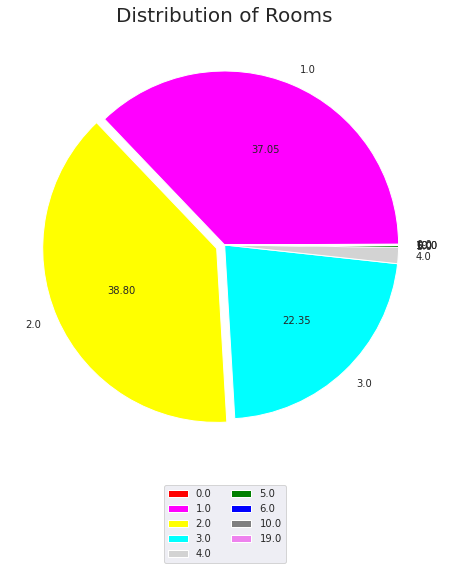

In [ ]:
labels = list(map(str, list(t_df.groupby('Rooms').count().index)))
values = values_list
colors = ['red','magenta','yellow','cyan','lightgrey','green','blue','grey','violet']
plt.figure(figsize=(8,8))
plt.title(label="Distribution of Rooms",fontsize=20)

explode = [0,0,0,0,0,0,0,0,0]
explode[values_list.index(max(values_list))] = 0.05

plt.pie(values,
        labels = labels,
        colors=colors,
        explode=explode,
        autopct = lambda p: format(p, '.2f') if p > 15 else None)
plt.legend(labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)


plt.show()

####2. Постройте гистограмму целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир

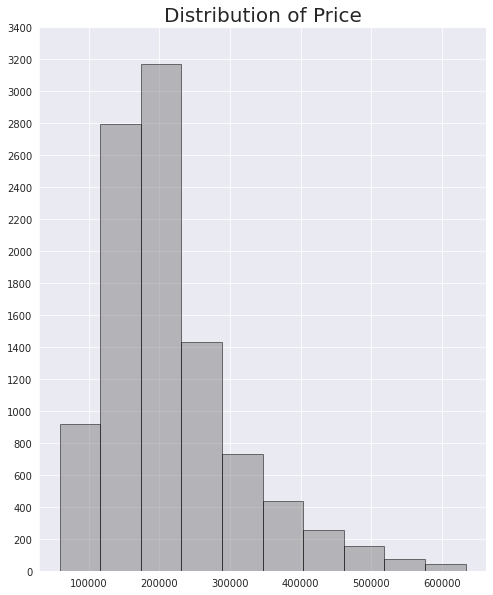

In [ ]:
plt.figure(figsize=(8,10))
plt.title(label="Distribution of Price",fontsize=20)
plt.hist(t_df.Price, bins = 10, stacked = True, color = 'grey', edgecolor = 'k', alpha = 0.5)
plt.yticks(np.arange(0, 3500, 200))
plt.show()

Наибольшее число квартир продается по цене ~ 3200 д.е.

####3. Постройте диаграммы рассеяния для признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear` в зависимости от целевой переменной Price в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

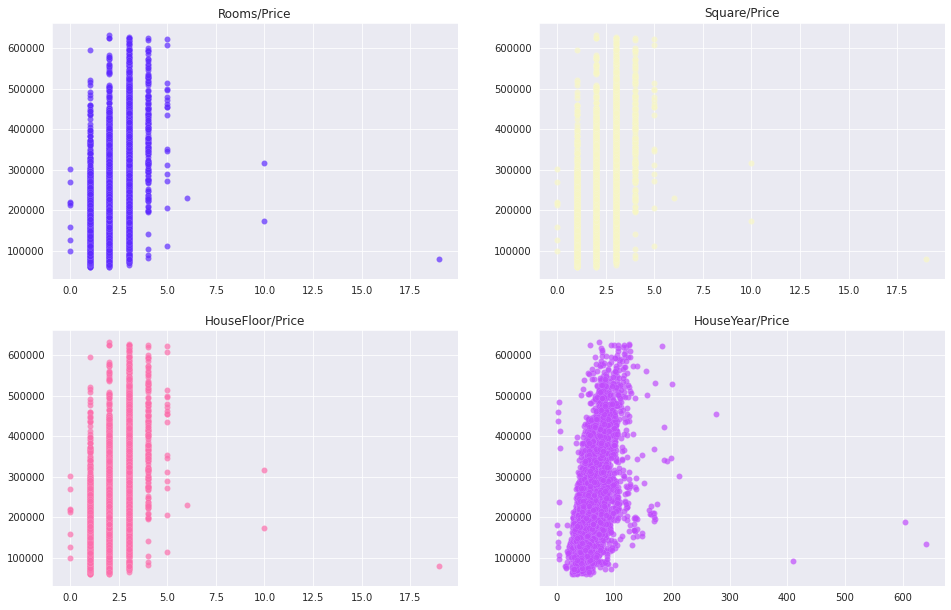

In [ ]:
fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(321)
ax1.set(title='Rooms/Price')
ax2 = fig.add_subplot(322)
ax2.set(title='Square/Price')
ax3 = fig.add_subplot(323)
ax3.set(title='HouseFloor/Price')
ax4 = fig.add_subplot(324)
ax4.set(title='HouseYear/Price')

ax1.scatter(t_df.Rooms,t_df.Price, color = "#5E2BFF", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax2.scatter(t_df.Rooms,t_df.Price, color = "#F7F6C5", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax3.scatter(t_df.Rooms,t_df.Price, color = "#FC6DAB", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax4.scatter(t_df.Square,t_df.Price, color = "#C04CFD", edgecolors = "white", linewidths = 0.1, alpha = 0.7)

plt.show()

####4. Постройте ядерную оценку плотности целевой переменной `Price`. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной `Price` и признака `HouseFloor`, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.

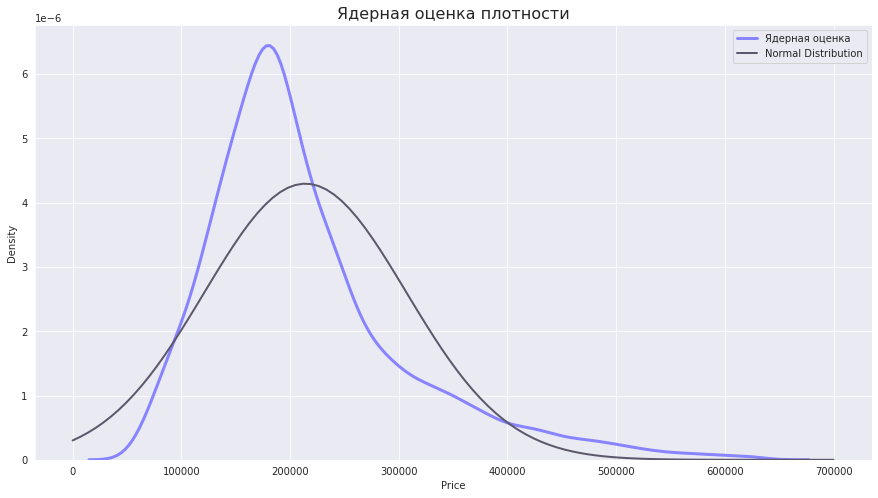

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Ядерная оценка плотности",fontsize=16)

sns.kdeplot(data=t_df.Price, label="Ядерная оценка",color='#8884FF', lw=3)

x = np.linspace(0, 700000, 100)
X = norm(loc=np.mean(t_df.Price),scale=np.std(t_df.Price))
plt.plot(x,X.pdf(x), label="Normal Distribution", color='#5D576B',lw=2)


plt.legend()
plt.show()

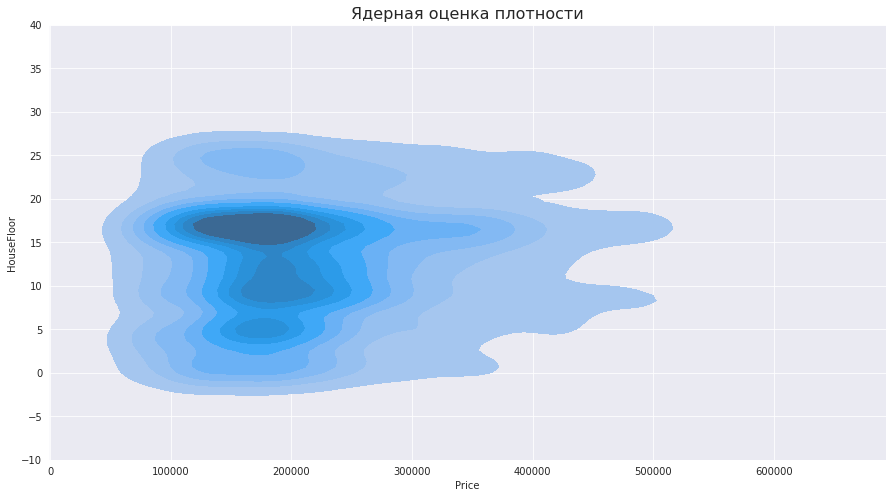

In [ ]:
plt.figure(figsize=(15, 8))
plt.ylim(-10,40)
plt.title("Ядерная оценка плотности",fontsize=16)
plt.yticks(np.arange(-10, 41, 5))
sns.kdeplot(x=t_df.Price, y=t_df.HouseFloor,fill=True)


plt.show()

#### Красивая версия

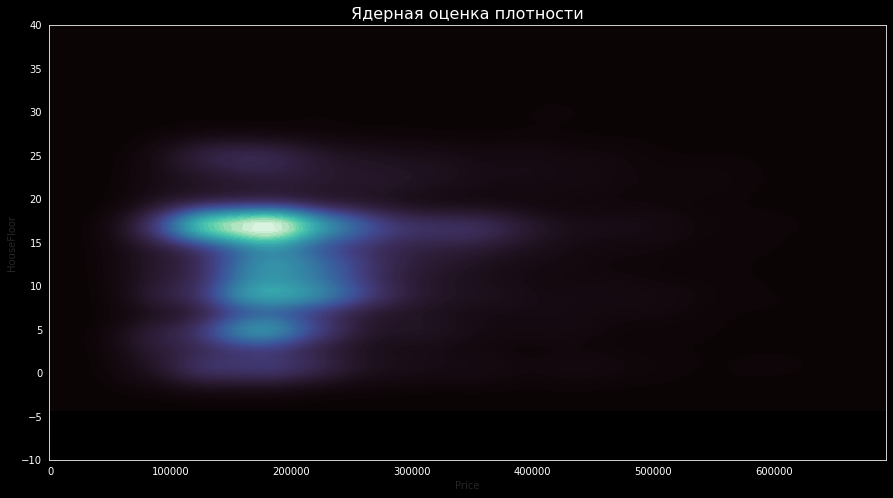

In [ ]:
#@title
fig = plt.figure(figsize=(15, 8),facecolor='black')
ax = fig.add_subplot(111)
ax.set_facecolor('black')
plt.grid(color='black')
plt.ylim(0,40)
plt.title("Ядерная оценка плотности",fontsize=16,color = 'white')
plt.yticks(np.arange(-10, 41, 5))
plt.tick_params(axis='both', colors='white')
sns.kdeplot(x=t_df.Price, y=t_df.HouseFloor,fill = True, thresh=0, levels=100, cmap="mako")

plt.show()

####5. Постройте ящиковую диаграмму признака `Square`. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


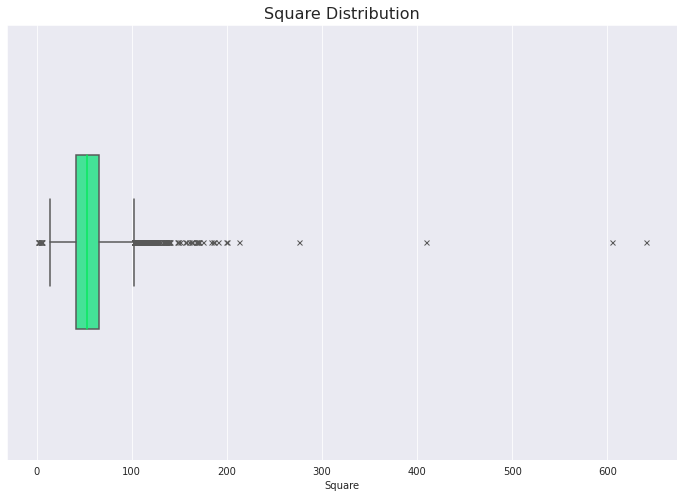

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Square Distribution",fontsize=16)
sns.boxplot(t_df.Square,
            width=0.4,
            flierprops={"marker": "x"},
            medianprops={"color": "#09E85E"},
            color='#2AFC98')
plt.show()

Выбросы начинаются с 100 квадратных метров

####6. При помощи сетки графиков `PairGrid` визуализируйте попарные отношения признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear`, `Price` следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

<Figure size 1152x1152 with 0 Axes>

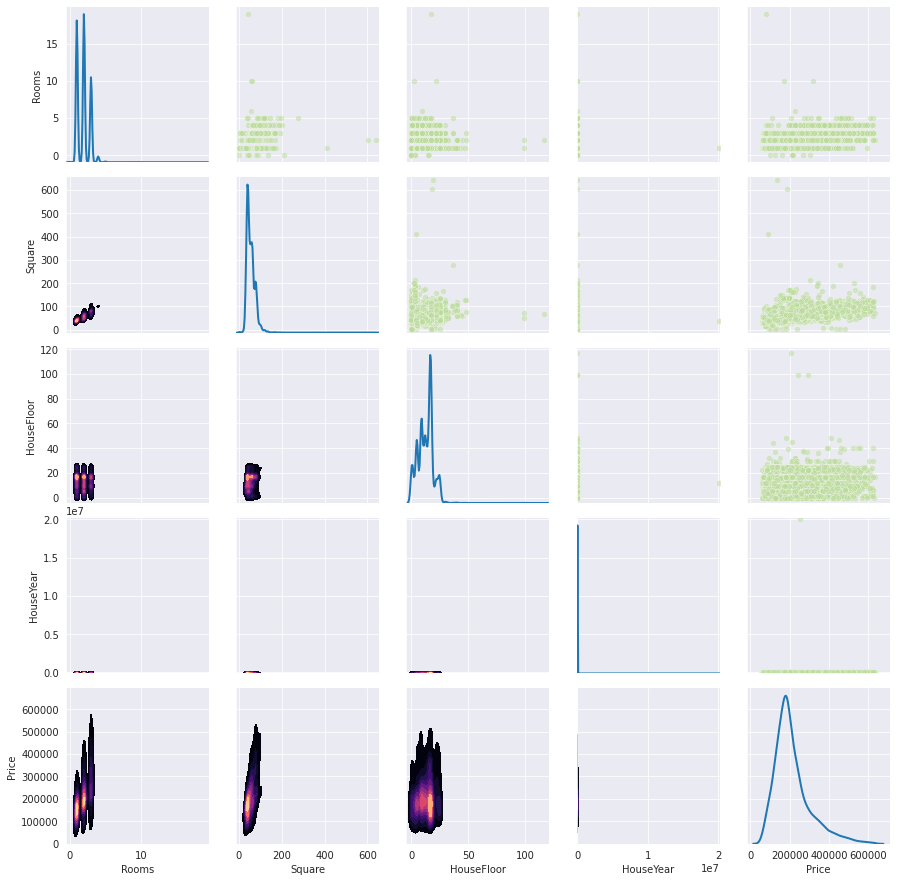

In [ ]:
plt.figure(figsize=(16,16))
a = sns.PairGrid(t_df[["Rooms","Square","HouseFloor","HouseYear","Price"]],diag_sharey=False)
# diag_sharey=False
a.map_upper(sns.scatterplot, alpha=0.5, color='#BBDB9B')
a.map_lower(sns.kdeplot,hue=None, shade=True, cmap="magma")
a.map_diag(sns.kdeplot, lw=2)

####7. Постройте тепловую карту матрицы корреляции (`df.corr()`) признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear`, `Price`. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

In [ ]:
corr_matrix = t_df[["Rooms","Square","HouseFloor","HouseYear","Price"]].corr()
corr_matrix

,Rooms,Square,HouseFloor,HouseYear,Price
Rooms,1.000000,0.662893,-0.029302,-0.010612,0.550291
Square,0.662893,1.000000,0.081505,-0.009032,0.520075
HouseFloor,-0.029302,0.081505,1.000000,-0.000864,0.088280
HouseYear,-0.010612,-0.009032,-0.000864,1.000000,0.004305
Price,0.550291,0.520075,0.088280,0.004305,1.000000


```
ValueError: '0' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma',...
```

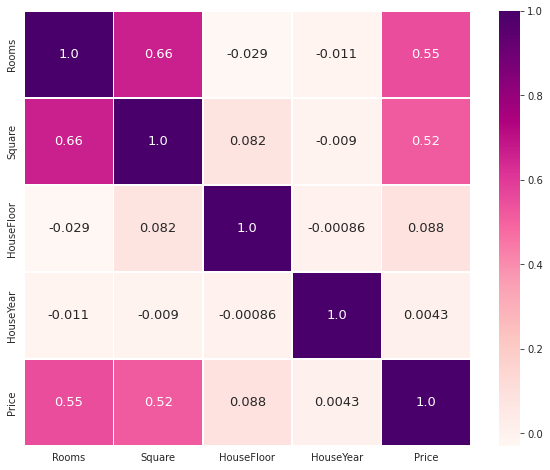

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            linewidths=.5, 
            annot=True, 
            fmt='.2', 
            annot_kws={'fontsize':13}, 
            cmap='RdPu')
plt.show()

In [ ]:
corr_list = sorted(list(chain(*corr_matrix.values.tolist())), reverse=True)
corr_list = [corr_list[x] for x in range(len(corr_list)) if x%2 != 1]
corr_list

[1.0,
 1.0,
 1.0,
 0.662892911737777,
 0.5502907269258871,
 0.5200745028416482,
 0.08827977424050933,
 0.0815045885454527,
 0.004305394519276772,
 -0.000864152066437866,
 -0.009031670776643281,
 -0.010611769353465994,
 -0.029302461714319404]